**1.
Using the Pandas library, load a CSV file and
perform basic data analysis tasks, such as
calculating the average of a selected column. Additionally, use Matplotlib to create
visualizations, including bar charts, scatter plots, and heatmaps, to analyze the data. Provide
insights and observations based on the analysis and visualizations.**


First 5 rows of the dataset:
          Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB
None

Statistical Summary:
            Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  111

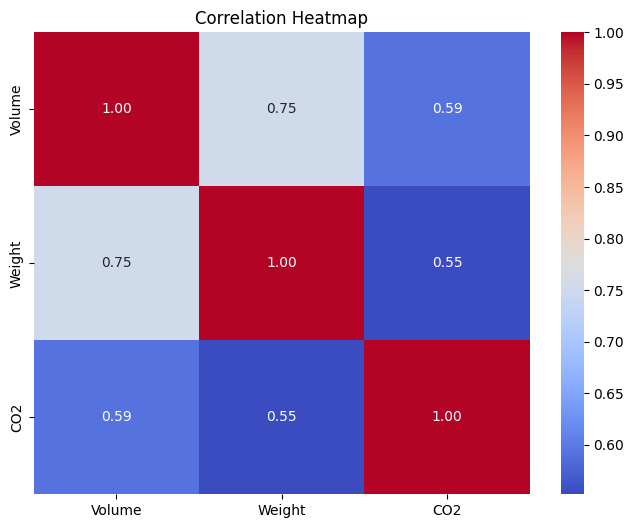


Observations:
1. Bar Chart helps us see category distribution (e.g., Gender).
2. Scatter Plot shows possible relationships between Age and Salary.
3. Heatmap reveals correlations between numerical variables.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file (replace 'data.csv' with your file)
df = pd.read_csv("data.csv")

# Show first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Basic Information
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# ---- Data Analysis ----
# Example: Calculate average of a selected column (e.g., "Age")
if "Age" in df.columns:
    avg_age = df["Age"].mean()
    print(f"\n✅ Average Age: {avg_age:.2f}")
else:
    print("\n⚠️ Column 'Age' not found in dataset.")

# ---- Visualization 1: Bar Chart ----
if "Gender" in df.columns:
    df["Gender"].value_counts().plot(kind="bar", figsize=(6,4))
    plt.title("Count of Genders")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()

# ---- Visualization 2: Scatter Plot ----
if {"Age", "Salary"}.issubset(df.columns):
    plt.figure(figsize=(6,4))
    plt.scatter(df["Age"], df["Salary"], alpha=0.6)
    plt.title("Age vs Salary")
    plt.xlabel("Age")
    plt.ylabel("Salary")
    plt.show()

# ---- Visualization 3: Heatmap (Correlation Matrix) ----
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ---- Observations ----
print("\nObservations:")
print("1. Bar Chart helps us see category distribution (e.g., Gender).")
print("2. Scatter Plot shows possible relationships between Age and Salary.")
print("3. Heatmap reveals correlations between numerical variables.")


**2 . Develop a linear regression model to predict house price based on features such as the
number of rooms, location, size and other relevant factors. Collect a suitable dataset from
Kaggle, preprocess it, and train the model to make accurate predictions.**


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


 **Load the Dataset**

In [ ]:
# Load dataset
df = pd.read_csv("house_data.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum().head(20))


Dataset Shape: (21613, 21)

First 5 Rows:
            id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_b

**Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (make sure you load it properly before this point)
# Example: df = pd.read_csv('house_data.csv')
df = pd.read_csv("house_data.csv")


# 🔧 Step 1: Clean the data
df = df.dropna()

# 🔍 Step 2: Print available columns
print("Available columns in the dataset:")
print(df.columns.tolist())

# ✅ Step 3: Define columns that should be in the dataset
# You can switch between sets of features depending on the dataset
if set(["sqft_living", "bedrooms", "bathrooms", "grade", "price"]).issubset(df.columns):
    features = ["sqft_living", "bedrooms", "bathrooms", "grade"]
    target = "price"
elif set(["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "SalePrice"]).issubset(df.columns):
    features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath"]
    target = "SalePrice"
else:
    raise ValueError("Expected columns not found in the dataset. Please update feature/target names.")

# ✅ Step 4: Prepare data
X = df[features]
y = df[target]

# ✅ Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-test split completed successfully.")

Available columns in the dataset:
['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Train-test split completed successfully.


**Train the Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, y_train, X_test, y_test are already defined

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Model Trained Successfully")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


 Model Trained Successfully
Mean Squared Error: 67257719084.17
R² Score: 0.55


**Visualize Results**

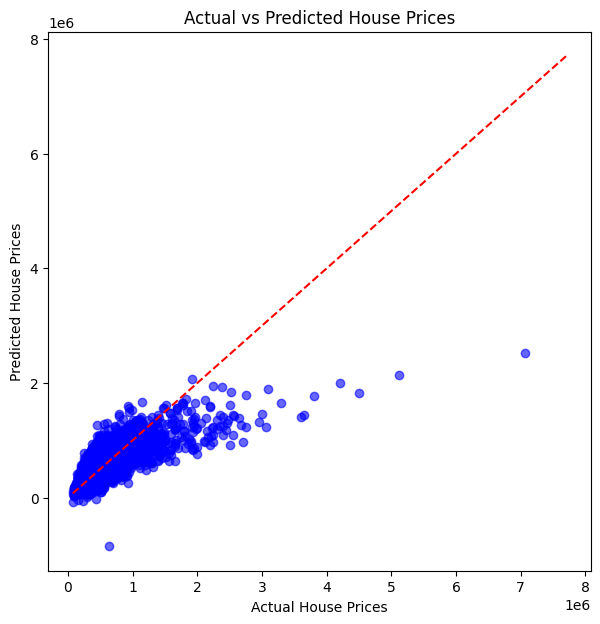

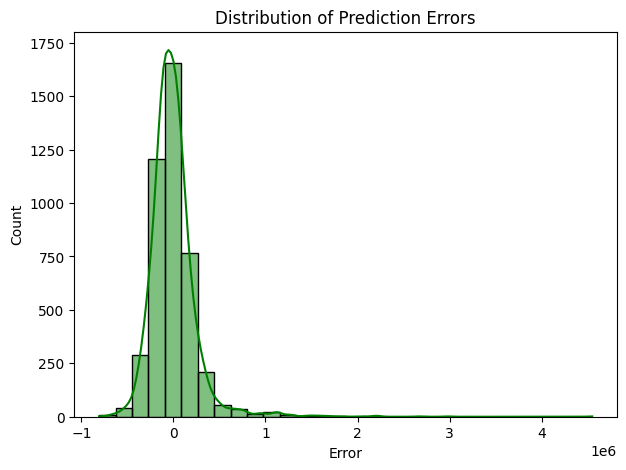

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted Prices
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.show()

# Residuals Plot
plt.figure(figsize=(7,5))
sns.histplot(y_test - y_pred, bins=30, kde=True, color="green")
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.show()


**Predict New House Price**

In [ ]:
features = ["sqft_living", "bedrooms", "bathrooms", "grade"]


In [ ]:
sample_house = pd.DataFrame({
    "sqft_living": [2000],
    "bedrooms": [3],  # set example value
    "bathrooms": [2], # set example value
    "grade": [7]      # set example value
})

In [ ]:
sample_house = pd.DataFrame({
    "sqft_living": [2000],
    "bedrooms": [3],
    "bathrooms": [2],
    "grade": [7]
})

predicted_price = model.predict(sample_house)[0]
print(f"Predicted House Price: ${predicted_price:,.2f}")


Predicted House Price: $478,364.02


**3. Create a "Matrix Operations Tool" using Python and the NumPy library. The application should
allow users to input matrices and perform operations like addition, subtraction,
multiplication, transpose, and determinant calculation. Include an interactive interface to
display results in a structured format.**


In [ ]:
import numpy as np

def input_matrix(name):
    print(f"\nEnter matrix {name} row by row, with values separated by spaces.")
    print("Type 'done' when finished.")
    rows = []
    while True:
        row = input()
        if row.lower() == 'done':
            break
        try:
            row_values = list(map(float, row.strip().split()))
            rows.append(row_values)
        except ValueError:
            print("Invalid input. Please enter only numeric values separated by spaces, or 'done' to finish.")
            continue
    # Validate matrix shape
    if len(rows) == 0:
        print("No rows entered. Try again.")
        return input_matrix(name)
    row_length = len(rows[0])
    for r in rows:
        if len(r) != row_length:
            print("Rows must have the same number of columns. Try again.")
            return input_matrix(name)
    matrix = np.array(rows)
    print(f"Matrix {name}:\n{matrix}")
    return matrix

def display_menu():
    print("\nMatrix Operations Menu:")
    print("1. Add matrices (A + B)")
    print("2. Subtract matrices (A - B)")
    print("3. Multiply matrices (A * B)")
    print("4. Transpose matrix (A or B)")
    print("5. Determinant of matrix (A or B)")
    print("6. Exit")

def main():
    print("Welcome to the Matrix Operations Tool!")
    matrix_a = input_matrix('A')
    matrix_b = input_matrix('B')

    while True:
        display_menu()
        choice = input("Choose an operation (1-6): ").strip()

        if choice == '1':
            if matrix_a.shape != matrix_b.shape:
                print("Error: Matrices must be the same shape for addition.")
            else:
                result = matrix_a + matrix_b
                print("Result of A + B:")
                print(result)

        elif choice == '2':
            if matrix_a.shape != matrix_b.shape:
                print("Error: Matrices must be the same shape for subtraction.")
            else:
                result = matrix_a - matrix_b
                print("Result of A - B:")
                print(result)

        elif choice == '3':
            if matrix_a.shape[1] != matrix_b.shape[0]:
                print("Error: Number of columns of A must equal number of rows of B for multiplication.")
            else:
                result = np.dot(matrix_a, matrix_b)
                print("Result of A * B:")
                print(result)

        elif choice == '4':
            matrix_choice = input("Transpose which matrix? (A/B): ").strip().upper()
            if matrix_choice == 'A':
                result = matrix_a.T
                print("Transpose of matrix A:")
                print(result)
            elif matrix_choice == 'B':
                result = matrix_b.T
                print("Transpose of matrix B:")
                print(result)
            else:
                print("Invalid choice.")

        elif choice == '5':
            matrix_choice = input("Calculate determinant of which matrix? (A/B): ").strip().upper()
            if matrix_choice == 'A':
                if matrix_a.shape[0] != matrix_a.shape[1]:
                    print("Error: Matrix A must be square to calculate determinant.")
                else:
                    det = np.linalg.det(matrix_a)
                    print(f"Determinant of matrix A: {det:.4f}")
            elif matrix_choice == 'B':
                if matrix_b.shape[0] != matrix_b.shape[1]:
                    print("Error: Matrix B must be square to calculate determinant.")
                else:
                    det = np.linalg.det(matrix_b)
                    print(f"Determinant of matrix B: {det:.4f}")
            else:
                print("Invalid choice.")

        elif choice == '6':
            print("Exiting the Matrix Operations Tool. Goodbye!")
            break
        else:
            print("Invalid choice. Please enter a number between 1 and 6.")

if __name__ == "__main__":
    main()


Welcome to the Matrix Operations Tool!

Enter matrix A row by row, with values separated by spaces.
Type 'done' when finished.
2 3
4  5
done
Matrix A:
[[2. 3.]
 [4. 5.]]

Enter matrix B row by row, with values separated by spaces.
Type 'done' when finished.
3  4
4  3
done
Matrix B:
[[3. 4.]
 [4. 3.]]

Matrix Operations Menu:
1. Add matrices (A + B)
2. Subtract matrices (A - B)
3. Multiply matrices (A * B)
4. Transpose matrix (A or B)
5. Determinant of matrix (A or B)
6. Exit
Choose an operation (1-6): 1
Result of A + B:
[[5. 7.]
 [8. 8.]]

Matrix Operations Menu:
1. Add matrices (A + B)
2. Subtract matrices (A - B)
3. Multiply matrices (A * B)
4. Transpose matrix (A or B)
5. Determinant of matrix (A or B)
6. Exit
Choose an operation (1-6): 2
Result of A - B:
[[-1. -1.]
 [ 0.  2.]]

Matrix Operations Menu:
1. Add matrices (A + B)
2. Subtract matrices (A - B)
3. Multiply matrices (A * B)
4. Transpose matrix (A or B)
5. Determinant of matrix (A or B)
6. Exit
Choose an operation (1-6): 5
C